  <tr>
        <td width="15%">
        </td>
        <td>
            <div align="left">
                <font size=25px>
                    <b>  Predicting Term Deposit Subscription by a client
                    </b>
                </font>
            </div>
        </td>
    </tr>

## Problem Statement:
The objective of the dataset is to predict whether or not a client will subscribe to the term deposit.  

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

The dataset consists of several predictor variables and one target variable, Outcome. Predictor variables includes the age, job, marital status, and so on.


## Data Definition:

Input variables:

1) **age** (numeric)


2) **job:**  type of job (categorical: 'admin.','blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired','self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')


3) **marital:** &nbsp;&nbsp; marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4) **education:** (categorical: 'basic.4y', 'basic.6y' ,'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree','unknown')


5) **default:** has credit in default? (categorical: 'no','yes','unknown')


6) **housing:** has housing loan? (categorical: 'no','yes','unknown')


7) **loan:**    has personal loan? (categorical: 'no','yes','unknown')


8) **contact:** contact communication type (categorical: 'cellular','telephone') 


9) **month:**   last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')


10) **day_of_week:** last contact day of the week (categorical: 'mon','tue','wed','thu','fri')


11) **duration:** last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.


12) **campaign:** number of contacts performed during this campaign and for this client (numeric, includes last contact)


13) **pdays:** number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)


14) **previous:** number of contacts performed before this campaign and for this client (numeric)


15) **poutcome:** outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


16) **emp.var.rate:** employment variation rate - quarterly indicator (numeric)


17) **cons.price.idx:** consumer price index - monthly indicator (numeric) 


18) **cons.conf.idx:** consumer confidence index - monthly indicator (numeric) 


19) **euribor3m:** euribor 3 month rate - daily indicator (numeric)


20) **nr.employed:** number of employees - quarterly indicator (numeric)



Output variable (desired target):

21) **y** - has the client subscribed a term deposit? (binary: 'yes','no')


## Content

1. **[Import Packages](#import_packages)**
2. **[Read Data](#Read_Data)**
3. **[Understand and Prepare the Data](#data_preparation)**
    - 3.1 - [Data Types and Dimensions](#Data_Types)
    - 3.2 - [Statistical Summary](#Statistical_Summary)
    - 3.3 - [Label Encoding for Target Variable](#Label_Encoding_for_Target_Variable)
    - 3.4 - [One Hot Encoding for Categorical Variables](#One_Hot_Encoding_for_Categorical_Variables)
    - 3.5 - [Missing Data Treatment](#Missing_Data_Treatment)
    - 3.6 - [Correlation](#Correlation)
4. **[Support Vector Machine](#SVM)**
    - 4.1 - [ Support Vector Machine using Linear Kernal](#Linear)
    - 4.2 - [Support Vector Machine using Gaussian Kernal](#Gaussian)
    - 4.3 - [Support Vector Machine using Sigmoid Kernal](#Sigmoid)
    - 4.4 - [Support Vector Machine using Polynomial Kernal](#Poly)
    - 4.5 - [Support Vector Machine using Polynomial Kernal with degree of polynomial = 2](#Poly_d)
    - 4.6 - [Support Vector Machine using Polynomial Kernal using GridSearchCV](#Poly_Grid)
    

<a id='import_packages'></a>
## 1. Import Packages

In [30]:
# import pandas
import pandas as pd

# import numpy
import numpy as np

# import matplotlib
import matplotlib.pyplot as plt

# to save graph within the notebook
%matplotlib inline

# import seaborn
import seaborn as sns

# import statsmodel
import statsmodels.api as sm

# 'Scikit-learn' (sklearn) emphasizes various regression, classification and clustering algorithms
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC


# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# use below code to convert the 'exponential' values to float upto 6 decimals
pd.set_option('display.float_format', lambda x: '%.6f' % x)

<a id='Read_Data'></a>
## 2. Read the Data

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>Read the data using read_csv() function from pandas<br> 
                </font>
            </div>
        </td>
    </tr>
</table>

In [59]:
# read the data
df_term_deposit = pd.read_csv("bank_additional_full.csv",delimiter=';')

# print the first five rows of the data
df_term_deposit.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no


<a id='data_preparation'></a>
## 3. Understand and Prepare the Data

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>The process of data preparation entails cleansing, structuring and integrating data to make it ready for analysis. <br><br>
                        Here we will analyze and prepare data to perform regression techniques:<br>
                        1. Check dimensions and data types of the dataframe <br>
                        2. Study summary statistics<br> 
                        3. Check for missing values<br>
                        4. Study correlation<br>
                                       </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='Data_Types'></a>
## 3.1 Data Types and Dimensions

In [60]:
# check the data types for variables
df_term_deposit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

<table align='left'>
    <tr>
        <td width='8%'>
            <img src='note.png'>
        </td>
        <td>
            <div align='left', style='font-size:120%'>
                    <b>From the above output, we see that not all the variables are numeric. Many variables, including the target variable are categorical variables<br>
                    </br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [61]:
# get the shape
print(df_term_deposit.shape)

(41188, 21)


**We see the dataframe has 21 columns and 41188 observations**

<table align='left'>
    <tr>
        <td width='8%'>
            <img src='note.png'>
        </td>
        <td>
            <div align='left', style='font-size:120%'>
                    <b>We chack the class distribution of the target variable<br>
                    </br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [62]:
df_term_deposit.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [47]:
df_term_deposit.pdays.value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: pdays, dtype: int64

In [63]:
print("Total number of people: {}".format(df_term_deposit.shape[0]))
print("Number of people opted for Term Deposit: {}".format(df_term_deposit[df_term_deposit.y == 'no'].shape[0]))
print("Number of people not opted for Term Deposit: {}".format(df_term_deposit[df_term_deposit.y == 'yes'].shape[0]))

Total number of people: 41188
Number of people opted for Term Deposit: 36548
Number of people not opted for Term Deposit: 4640


#### We see that the data is imbalanced

<a id='Statistical_Summary'></a>
## 3.2 Statistical Summary
Here we take a look at the summary of each attribute. This includes the count, mean, the min and max values as well as some percentiles for numeric variables.

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b> In our dataset we have numerical variables. Now we check for summary statistics of all the variables<br>
                        For numerical variables, we use .describe(). For categorical variables we use describe(include='object').
          <br>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [64]:
# data frame with numerical features
df_term_deposit.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.024060,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.421250,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
<b>The above output illustrates the summary statistics of all the numeric variables like the mean, median(50%), minimum, and maximum values, along with the standard deviation.</b>     </font>
            </div>
        </td>
    </tr>
</table>

In [65]:
# data frame with categorical features
df_term_deposit.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
<b>The above output illustrates the summary statistics of all the categorical variables like unique(no.of levels in the variable), top(majority level) and the count of the majority level.</b>     </font>
            </div>
        </td>
    </tr>
</table>

In [66]:
## Selecting categorical variables.

cat_cols = df_term_deposit.select_dtypes(include=object)
cat_cols.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [67]:
## Value counts
for col in cat_cols.columns:
    print(f'Column name: {col}')
    print()
    print(df_term_deposit.loc[:,col].value_counts())
    print()

Column name: job

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

Column name: marital

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

Column name: education

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

Column name: default

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

Column name: housing

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

Column name: loan

no         33950
yes         6248
unknown      9

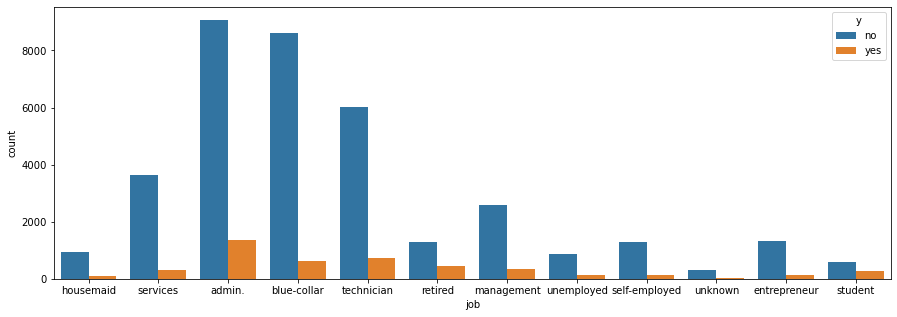

In [46]:
plt.figure(figsize=(15,5))
sns.countplot(x='job', hue='y',data=df_term_deposit)
plt.show()

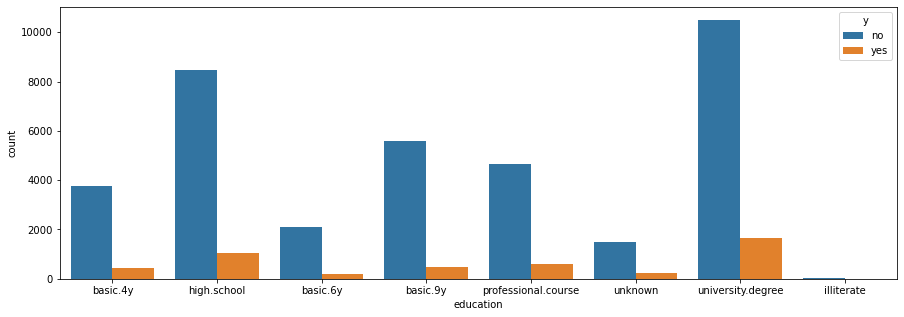

In [68]:
plt.figure(figsize=(15,5))
sns.countplot(x='education', hue='y',data=df_term_deposit)
plt.show()

In [70]:
df_term_deposit.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [27]:
s = pd.Series(['basic.4y','basic.6y','basic.8y'])
s = s.str.replace(r'.[0-9]y','',regex=True)
print(s)


0    basic
1    basic
2    basic
dtype: object


In [29]:
s = pd.Series(['basic.4y','basic.6y','basic.8y'])
s.str.replace(r'basic\.[0-9]y+','Primary',regex=True)

0    Primary
1    Primary
2    Primary
dtype: object

In [71]:
## taking a backing up of dataframe
df = df_term_deposit.copy(deep=True)

In [72]:
df.shape

(41188, 21)

<a id='Label_Encoding_for_Target_Variable'></a>
## 3.3. Label Encoding for Target Variable
Converting target categorical variable into numeric

In [73]:
# replace 'no' with zero
df_term_deposit['y'] = df_term_deposit['y'].replace('no', 0)
# replace 'yes' with one
df_term_deposit['y'] = df_term_deposit['y'].replace('yes', 1)

df_term_deposit.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,0


<a id='One_Hot_Encoding_for_Categorical_Variables'></a>
## 3.4. One Hot Encoding for Categorical Variables
Converting categorical variables into a form that could be provided to ML algorithms to do a better job in prediction.

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>In order to convert categorical variables to numeric variables we will first segregate such vaiarbles in one dataframe and numeric variables in another. Use pandas.get_dummies function to Convert categorical variable into dummy/indicator variables and then use concat function to merge two dataframe for further analysis.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [74]:
# save all categorical columns in list
categorical_columns = [col for col in df_term_deposit.columns.values if df_term_deposit[col].dtype == 'object']

# dataframe with categorical features
data_cat = df_term_deposit[categorical_columns]
# dataframe with numerical features
data_num = df_term_deposit.drop(categorical_columns, axis=1)

In [75]:
# Convert categorical variables into dummy variables.
#drop_first = TRUE for n-1 dummy coding
data_cat_dummies  = pd.get_dummies(data_cat,drop_first=True)

In [76]:
# merger the two datafraes for further analysis
df_term_deposit = pd.concat([data_num, data_cat_dummies], axis=1)

<a id='Missing_Data_Treatment'></a>
## 3.5. Missing Data Treatment
If the missing values are not handled properly we may end up drawing an inaccurate inference about the data. Due to improper handling, the result obtained will differ from the ones where the missing values are present.

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>In order to get the count of missing values in each column, we use the in-built function .isnull().sum()
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [77]:
# get the count of missing values
missing_values = df_term_deposit.isnull().sum()

# print the count of missing values
print(missing_values)

age                              0
duration                         0
campaign                         0
pdays                            0
previous                         0
emp.var.rate                     0
cons.price.idx                   0
cons.conf.idx                    0
euribor3m                        0
nr.employed                      0
y                                0
job_blue-collar                  0
job_entrepreneur                 0
job_housemaid                    0
job_management                   0
job_retired                      0
job_self-employed                0
job_services                     0
job_student                      0
job_technician                   0
job_unemployed                   0
job_unknown                      0
marital_married                  0
marital_single                   0
marital_unknown                  0
education_basic.6y               0
education_basic.9y               0
education_high.school            0
education_illiterate

There are no missing values present in the data.

<a id='Correlation'></a>
## 3.6 Correlation

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b> Call the corr() function which will return the correlation matrix of numeric variables</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [78]:
# check correlation
data_num = data_num.drop('y', axis=1)
corr = data_num.corr()
corr

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


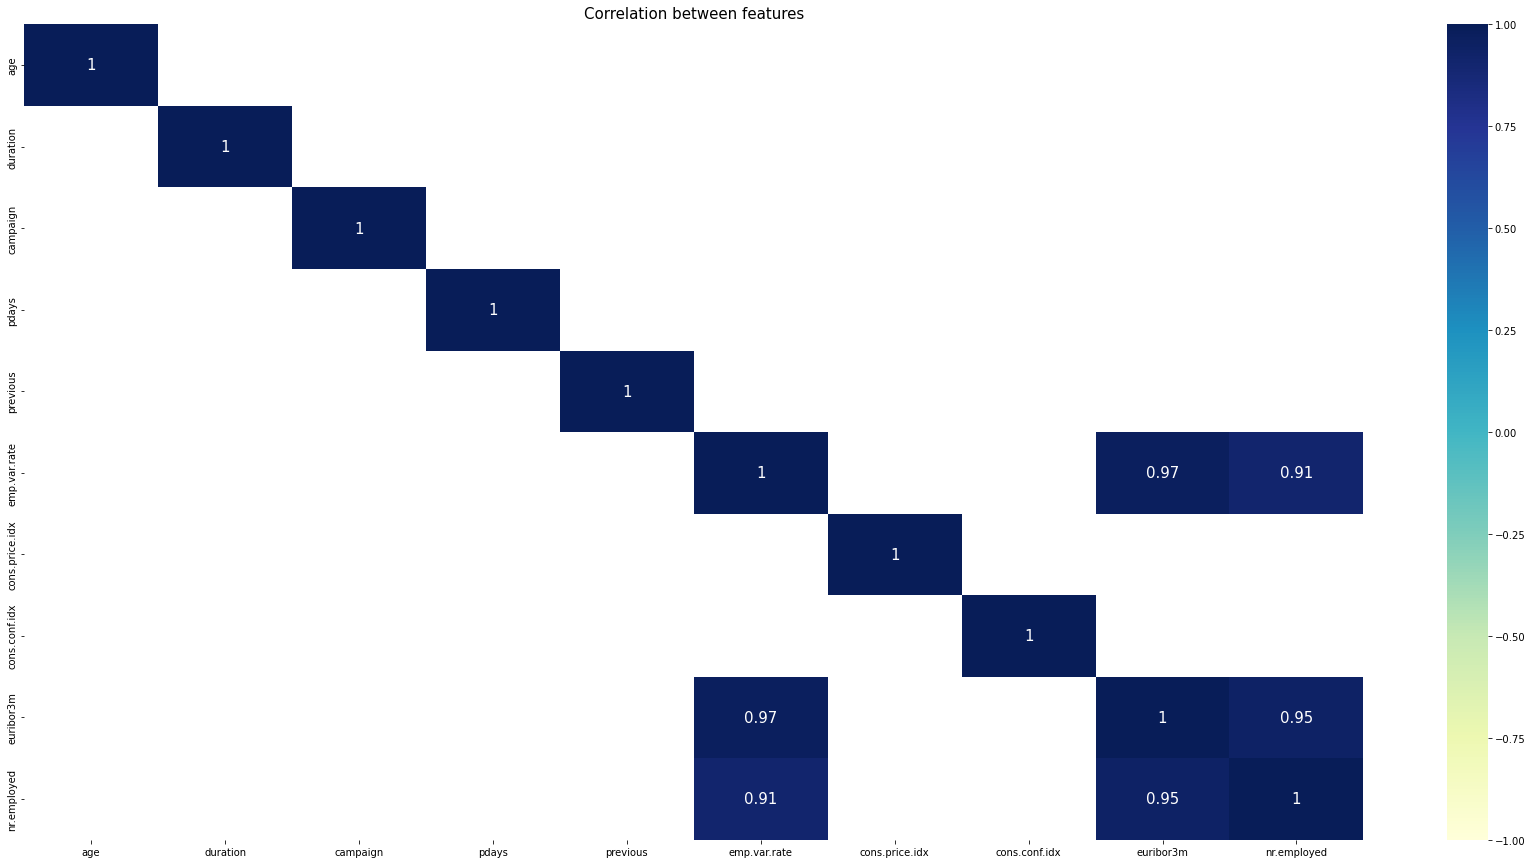

In [79]:
# ploting correlation plot

# set the figure size
plt.figure(figsize=(30, 15))

# plotting the heat map
# corr: give the correlation matrix
# cmap: colour code used for plotting
# vmax: gives maximum range of values for the chart
# vmin: gives minimum range of values for the chart
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# set condition to get a strong correlation between the variables
sns.heatmap(corr[(corr >= 0.9) | (corr <= -0.9)], 
            cmap='YlGnBu', vmax=1.0, vmin=-1.0,
            annot=True, annot_kws={"size": 15})

# set the title
# fontsize=30: set the font size of the title
plt.title('Correlation between features', fontsize=15)
# display the plot
plt.show()

<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
<b>By looking at the correlation matrix we can see that variables euribor3m, emp.var.rate and nr.employed have a strong positive correlation with each other. These feature pairs are strongly correlated to each other. Ideally, we should not select these features together for training the model. However, we will go ahead using all variables.</b>     </font>
            </div>
        </td>
    </tr>
</table>

Later, as a practice exercise, try building the model by dropping these highly correlated variables, and monitor its effect on model performance. You may refer the below commented code, for dropping the required variables.

In [88]:
# drop the features
# axis=1: it stands for column
# inplace=True: it perform operations on original data
#df_term_deposit.drop(['euribor3m', 'emp.var.rate', 'nr.employed'], axis=1, inplace=True)

In [80]:
# print the name of columns
df_term_deposit.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutc

<a id="SVM"> </a>
## 4. Support Vector Machine

<a id="Linear"> </a>
## 4.1 Support Vector Machine using Linear Kernal

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b> Now we build a SVM model using linear kernal. We start with our original data set gradually proceeding with our analysis<br><br>
                        In order to buil a  SVM model using linear kernal, we do the following:<br>
                        1. Split the dataset set <br>
                        2. Build the model<br>
                        3. Predict the values<br>
                        4. Compute the accuracy measures<br>
                        5. Tabulate the results <br>
                      </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**1. Split the dataset set**

In [81]:
df_term_deposit.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.100000,93.994000,-36.400000,4.857000,5191.000000,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
1,57,149,1,999,0,1.100000,93.994000,-36.400000,4.857000,5191.000000,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2,37,226,1,999,0,1.100000,93.994000,-36.400000,4.857000,5191.000000,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,40,151,1,999,0,1.100000,93.994000,-36.400000,4.857000,5191.000000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
4,56,307,1,999,0,1.100000,93.994000,-36.400000,4.857000,5191.000000,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0


In [82]:
# extract the predictor variables
X = df_term_deposit.iloc[:, df_term_deposit.columns != 'y']
# extract the target variable
y = df_term_deposit.iloc[:, df_term_deposit.columns == 'y']

In [83]:
# let us now split the dataset into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)

# print the shape of 'x_train'
print("X_train ",X_train.shape)

# print the shape of 'x_test'
print("X_test ",X_test.shape)

# print the shape of 'y_train'
print("y_train ",y_train.shape)

# print the shape of 'y_test'
print("y_test ",y_test.shape)

X_train  (28831, 53)
X_test  (12357, 53)
y_train  (28831, 1)
y_test  (12357, 1)


In [85]:
y_train.value_counts(normalize=True)

y
0   0.888384
1   0.111616
dtype: float64

In [86]:
y_test.value_counts(normalize=True)

y
0   0.884924
1   0.115076
dtype: float64

**2. Build the model**

In [87]:
# build the model
svclassifier = SVC(kernel = 'linear')

# fit the model
svclassifier.fit(X_train, y_train)


C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

**3. Predict the values**

In [88]:
# predict the values
y_pred = svclassifier.predict(X_test)

**4. Compute accuracy measures**

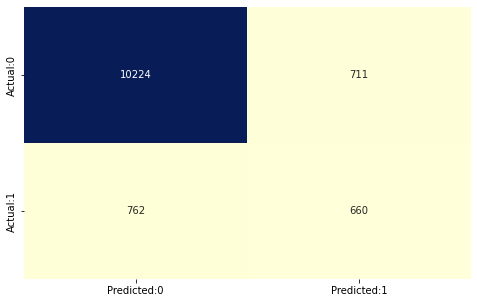

In [89]:
# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# label the confusion matrix  
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

# set sizeof the plot
plt.figure(figsize = (8,5))

# plot a heatmap
# cmap: colour code used for plotting
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# cbar=False: Whether to draw a colorbar
# fmt: string formatting code to use when adding annotations
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.show()

In [22]:
   # True Negatives are denoted by 'TN'
# Actual 'O' values which are classified correctly
TN = cm[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cm[1,1]

# False Negatives are denoted by 'FN'
# Actual '1' values which are classified wrongly as '0'
FN = cm[1,0]

# False Positives are denoted by 'FP'
# Actual 'O' values which are classified wrongly as '1'
FP = cm[0,1]                                                           

In [90]:
# accuracy measures by classification_report()
result = classification_report(y_test,y_pred)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     10935
           1       0.48      0.46      0.47      1422

    accuracy                           0.88     12357
   macro avg       0.71      0.70      0.70     12357
weighted avg       0.88      0.88      0.88     12357



In [24]:
# compute kappa value
kappa = metrics.cohen_kappa_score(y_test, y_pred)

# print kappa
print('kappa value:',kappa)

kappa value: 0.408157528327604


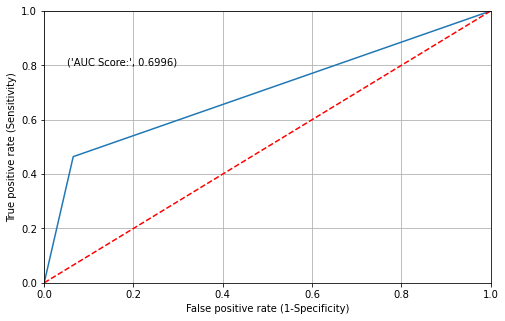

In [91]:
# set the figure size
plt.rcParams['figure.figsize']=(8,5)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# plot the ROC curve
plt.plot(fpr,tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add the AUC score
plt.text(x = 0.05, y = 0.8, s =('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred),4)))

# name the plot, and both axes
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')

# plot the grid
plt.grid(True)

<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner)<br><br>
We see our classifier is fairly away from the dotted line; which means the SVM with linear kernel classifier is a fairly good classifier  </b>
                </font>
            </div>
        </td>
    </tr>
</table>



**5. Tabulate the results**

In [98]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# create a list of column names
cols = ['Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score','f1-score']

# creating an empty dataframe of the colums
result_tabulation = pd.DataFrame(columns = cols)

# compiling the required information
SVM_linear_metrics = pd.Series({'Model': "SVM using linear kernel ",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred),
                 'Precision Score': metrics.precision_score(y_test, y_pred),
                 'Recall Score': metrics.recall_score(y_test, y_pred),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                 'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),
                  'f1-score':metrics.f1_score(y_test, y_pred)})



# appending our result table
result_tabulation = result_tabulation.append(SVM_linear_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,SVM using linear kernel,0.701270,0.482934,0.467651,0.881120,0.408158,0.475170


<a id="Gaussian"> </a>
## 4.2 Support Vector Machine using Gaussian Kernal

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b> Now we build a SVM model using Gaussian kernal. We start with our original data set gradually proceeding with our analysis<br><br>
                        In order to buil a  SVM model using Gaussian kernal, we do the following:<br>
                        1. Build the model<br>
                        2. Predict the values<br>
                        3. Compute the accuracy measures<br>
                        4. Tabulate the results <br>
                      </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**1. Build the model**

In [92]:
# build the model
svclassifier = SVC(kernel='rbf')
# fit the model
svclassifier.fit(X_train, y_train)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

**2. Do predictions on the test set**

In [93]:
# predict the values
y_pred_gaussian  = svclassifier.predict(X_test)

Before we compute the accuracy measures, let us plot the confusion matrix.

**3. Compute accuracy measures**

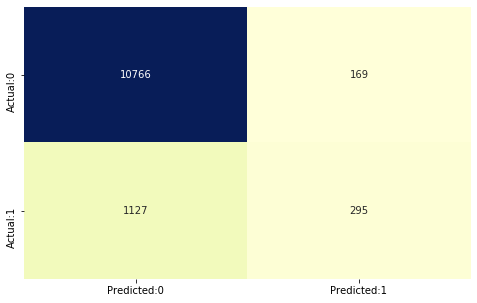

In [103]:
# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_gaussian)

# label the confusion matrix  
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

# set sizeof the plot
plt.figure(figsize = (8,5))

# plot a heatmap
# cmap: colour code used for plotting
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# cbar=False: Whether to draw a colorbar
# fmt: string formatting code to use when adding annotations
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.show()

In [104]:
# True Negatives are denoted by 'TN'
# Actual 'O' values which are classified correctly
TN = cm[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cm[1,1]

# False Negatives are denoted by 'FN'
# Actual '1' values which are classified wrongly as '0'
FN = cm[1,0]

# False Positives are denoted by 'FP'
# Actual 'O' values which are classified wrongly as '1'
FP = cm[0,1]                                                           

In [94]:
# accuracy measures by classification_report()
result = classification_report(y_test, y_pred_gaussian)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10935
           1       0.64      0.21      0.31      1422

    accuracy                           0.90     12357
   macro avg       0.77      0.60      0.63     12357
weighted avg       0.87      0.90      0.87     12357



In [106]:
# compute kappa value
kappa = metrics.cohen_kappa_score(y_test, y_pred_gaussian)

# print kappa
print('kappa value:',kappa)

kappa value: 0.27158643128078885


Cohen’s kappa statistic measures interrater reliability (sometimes called interobserver agreement). Interrater reliability, or precision, happens when your data raters (or collectors) give the same score to the same data item.
The kappa score can range between 0 -1, where.

<br>0 = agreement equivalent to chance.
<br>0.1 – 0.20 = slight agreement.
<br>0.21 – 0.40 = fair agreement.
<br>0.41 – 0.60 = moderate agreement.
<br>0.61 – 0.80 = substantial agreement.
<br>0.81 – 0.99 = near perfect agreement
<br>1 = perfect agreement.

Therefore from the above result we can say that there is a fair interobserver agreement 

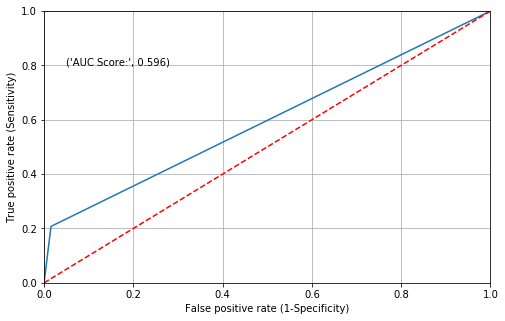

In [107]:
# set the figure size
plt.rcParams['figure.figsize']=(8,5)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_gaussian)

# plot the ROC curve
plt.plot(fpr,tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add the AUC score
plt.text(x = 0.05, y = 0.8, s =('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_gaussian),4)))

# name the plot, and both axes
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')

# plot the grid
plt.grid(True)

<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner)<br><br>
We see our classifier (SVM using linear gaussian) is not very far away from the dotted line; which means the SVM using gaussian classifier is not a very good classifier  </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**4. Tabulate the results**

In [108]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# create a list of column names


# compiling the required information
SVM_Gaussian_metrics = pd.Series({'Model': "SVM using gaussian kernal ",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred_gaussian),
                 'Precision Score': metrics.precision_score(y_test, y_pred_gaussian),
                 'Recall Score': metrics.recall_score(y_test, y_pred_gaussian),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_gaussian),
                 'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred_gaussian),
                  'f1-score':metrics.f1_score(y_test, y_pred_gaussian)})



# appending our result table
result_tabulation = result_tabulation.append(SVM_Gaussian_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,SVM using linear kernel,0.701270,0.482934,0.467651,0.881120,0.408158,0.475170
1,SVM using gaussian kernal,0.596000,0.635776,0.207454,0.895120,0.271586,0.312831


<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>It can be seen from the result tabulation, that all of the accuracy measures for both the models are not very good. However,  for term deposit subscription prediction, type 2 errors are costly. The type 2 error for both the above models are high. Hence, this may not be the best model for the required prediction.  </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id="Sigmoid"> </a>
## 4.3 Support Vector Machine using Sigmoid Kernal

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b> Now we build a SVM model using Sigmoid kernal. We start with our original data set gradually proceeding with our analysis<br><br>
                        In order to buil a  SVM model using Sigmoid kernal, we do the following:<br>
                        1. Build the model<br>
                        2. Predict the values<br>
                        3. Compute the accuracy measures<br>
                        4. Tabulate the results <br>
                      </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**1. Build the model**

In [95]:
# build the model
svclassifier = SVC(kernel='sigmoid')
# fit the model
svclassifier.fit(X_train, y_train)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='sigmoid')

**2. Predict the values for the test set**

In [96]:
# predict the values
y_pred_sigmoid  = svclassifier.predict(X_test)

**3. Compute accuracy measures**

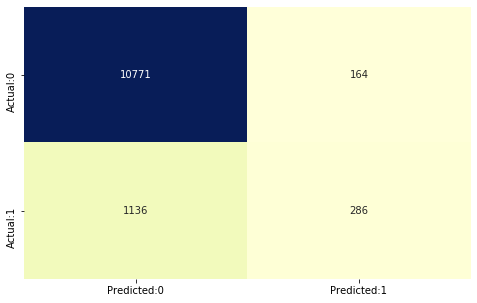

In [111]:
# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_sigmoid)

# label the confusion matrix  
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

# set sizeof the plot
plt.figure(figsize = (8,5))

# plot a heatmap
# cmap: colour code used for plotting
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# cbar=False: Whether to draw a colorbar
# fmt: string formatting code to use when adding annotations
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.show()

In [112]:
# True Negatives are denoted by 'TN'
# Actual 'O' values which are classified correctly
TN = cm[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cm[1,1]

# False Negatives are denoted by 'FN'
# Actual '1' values which are classified wrongly as '0'
FN = cm[1,0]

# False Positives are denoted by 'FP'
# Actual 'O' values which are classified wrongly as '1'
FP = cm[0,1]               

In [98]:
# accuracy measures by classification_report()
result = classification_report(y_test,y_pred_sigmoid)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     10935
           1       0.64      0.20      0.31      1422

    accuracy                           0.89     12357
   macro avg       0.77      0.59      0.62     12357
weighted avg       0.87      0.89      0.87     12357



In [114]:
# compute kappa value
kappa = metrics.cohen_kappa_score(y_test, y_pred_sigmoid)

# print kappa
print('kappa value:',kappa)

kappa value: 0.26488515915613153


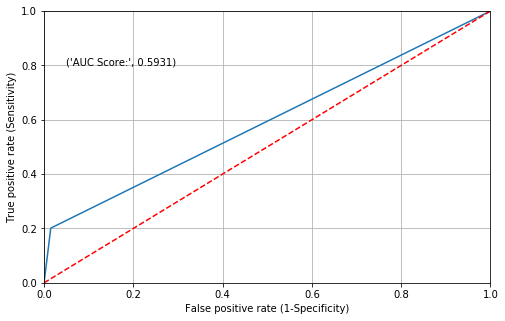

In [115]:
# set the figure size
plt.rcParams['figure.figsize']=(8,5)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_sigmoid)

# plot the ROC curve
plt.plot(fpr,tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add the AUC score
plt.text(x = 0.05, y = 0.8, s =('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_sigmoid),4)))

# name the plot, and both axes
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')

# plot the grid
plt.grid(True)

<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner)<br><br>
We see our classifier is not very far away from the dotted line; which means the it is not a good classifier  </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**5. Tabulate the results**

In [116]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# create a list of column names


# compiling the required information
SVM_sigmoid_metrics = pd.Series({'Model': "SVM using sigmoid kernal ",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred_sigmoid),
                 'Precision Score': metrics.precision_score(y_test, y_pred_sigmoid),
                 'Recall Score': metrics.recall_score(y_test, y_pred_sigmoid),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_sigmoid),
                 'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred_sigmoid),
                  'f1-score':metrics.f1_score(y_test, y_pred_sigmoid)})



# appending our result table
result_tabulation = result_tabulation.append(SVM_sigmoid_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,SVM using linear kernel,0.701270,0.482934,0.467651,0.881120,0.408158,0.475170
1,SVM using gaussian kernal,0.596000,0.635776,0.207454,0.895120,0.271586,0.312831
2,SVM using sigmoid kernal,0.593064,0.635556,0.201125,0.894796,0.264885,0.305556


<a id="Poly"> </a>
## 4.4 Support Vector Machine using Polynomial Kernal

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b> Now we build a SVM model using Polynomial kernal. We start with our original data set gradually proceeding with our analysis<br><br>
                        In order to build a  SVM model using Polynomial kernal, we do the following:<br>
                        1. Build the model<br>
                        2. Predict the values<br>
                        3. Compute the accuracy measures<br>
                        4. Tabulate the results <br>
                      </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**1. Build the model**

In [99]:
# build the model
svclassifier = SVC(kernel='poly')
# fit the model
svclassifier.fit(X_train, y_train)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='poly')

**2. Do predictions on the test set**

In [100]:
# predict the values
y_pred_Poly  = svclassifier.predict(X_test)

Before we compute the accuracy measures, let us plot the confusion matrix.

**3. Compute accuracy measures**

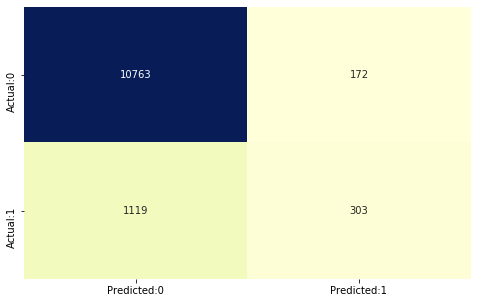

In [146]:
# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_Poly)

# label the confusion matrix  
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

# set sizeof the plot
plt.figure(figsize = (8,5))

# plot a heatmap
# cmap: colour code used for plotting
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# cbar=False: Whether to draw a colorbar
# fmt: string formatting code to use when adding annotations
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.show()

In [147]:
# True Negatives are denoted by 'TN'
# Actual 'O' values which are classified correctly
TN = cm[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cm[1,1]

# False Negatives are denoted by 'FN'
# Actual '1' values which are classified wrongly as '0'
FN = cm[1,0]

# False Positives are denoted by 'FP'
# Actual 'O' values which are classified wrongly as '1'
FP = cm[0,1] 

In [101]:
# accuracy measures by classification_report()
result = classification_report(y_test, y_pred_Poly)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10935
           1       0.64      0.21      0.32      1422

    accuracy                           0.90     12357
   macro avg       0.77      0.60      0.63     12357
weighted avg       0.87      0.90      0.87     12357



In [149]:
# compute kappa value
kappa = metrics.cohen_kappa_score(y_test, y_pred_Poly)

# print kappa
print('kappa value:',kappa)

kappa value: 0.2778338883046966


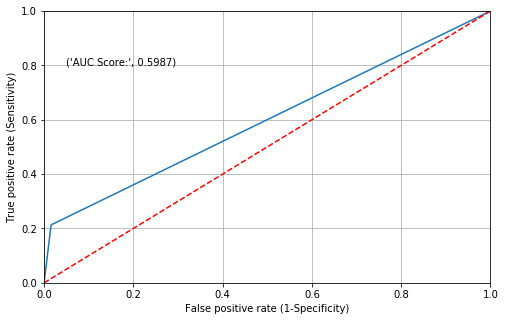

In [150]:
# set the figure size
plt.rcParams['figure.figsize']=(8,5)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_Poly)

# plot the ROC curve
plt.plot(fpr,tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add the AUC score
plt.text(x = 0.05, y = 0.8, s =('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_Poly),4)))

# name the plot, and both axes
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')

# plot the grid
plt.grid(True)

<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner)<br><br>
We see our classifier (SVM using polynomial sigmoid) is not very far away from the dotted line; which means the SVM using a polynomial classifier is not a very good classifier  </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**4. Tabulate the results**

In [126]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# create a list of column names


# compiling the required information
SVM_polynomial_metrics = pd.Series({'Model': "SVM using polynomial kernal ",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred_Poly),
                 'Precision Score': metrics.precision_score(y_test, y_pred_Poly),
                 'Recall Score': metrics.recall_score(y_test, y_pred_Poly),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_Poly),
                 'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred_Poly),
                  'f1-score':metrics.f1_score(y_test, y_pred_Poly)})



# appending our result table
result_tabulation = result_tabulation.append(SVM_polynomial_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,SVM using linear kernel,0.701270,0.482934,0.467651,0.881120,0.408158,0.475170
1,SVM using gaussian kernal,0.596000,0.635776,0.207454,0.895120,0.271586,0.312831
2,SVM using sigmoid kernal,0.593064,0.635556,0.201125,0.894796,0.264885,0.305556
3,SVM using polynomial kernal,0.598675,0.637895,0.213080,0.895525,0.277834,0.319452


<a id="Poly_d"> </a>
## 4.5 Support Vector Machine using Polynomial Kernal with degree of polynomial = 2

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b> Now we build a SVM model using Polynomial kernal, with degree=2. We start with our original data set gradually proceeding with our analysis<br><br>
                        In order to buil a  SVM model, we do the following:<br>
                        1. Build the model<br>
                        2. Predict the values<br>
                        3. Compute the accuracy measures<br>
                        4. Tabulate the results <br>
                      </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**1. Build the model**

In [105]:
# build the model
svclassifier_Poly = SVC(kernel='poly', degree = 2, gamma = 'auto')
# fit the model
svclassifier_Poly.fit(X_train, y_train)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KeyboardInterrupt: 

**2. Do predictions on the test set**

In [ ]:
# predict the values
y_pred_Poly_d  = svclassifier_Poly.predict(X_test)

Before we compute the accuracy measures, let us plot the confusion matrix.

**3. Compute accuracy measures**

In [ ]:
# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_Poly_d)

# label the confusion matrix  
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

# set sizeof the plot
plt.figure(figsize = (8,5))

# plot a heatmap
# cmap: colour code used for plotting
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# cbar=False: Whether to draw a colorbar
# fmt: string formatting code to use when adding annotations
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.show()

In [ ]:
# True Negatives are denoted by 'TN'
# Actual 'O' values which are classified correctly
TN = cm[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cm[1,1]

# False Negatives are denoted by 'FN'
# Actual '1' values which are classified wrongly as '0'
FN = cm[1,0]

# False Positives are denoted by 'FP'
# Actual 'O' values which are classified wrongly as '1'
FP = cm[0,1] 

In [ ]:
# accuracy measures by classification_report()
result = classification_report(y_test, y_pred_Poly_d)

# print the result
print(result)

In [33]:
# compute kappa value
kappa = metrics.cohen_kappa_score(y_test, y_pred_Poly_d)

# print kappa
print('kappa value:',kappa)

kappa value: 0.4751576862671667


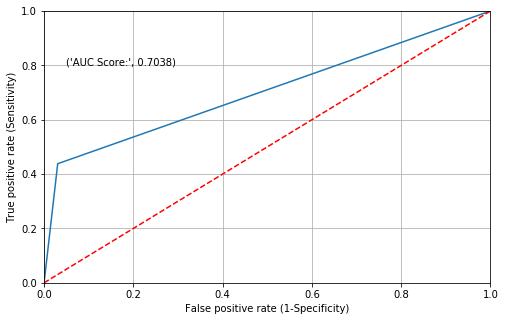

In [34]:
# set the figure size
plt.rcParams['figure.figsize']=(8,5)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_Poly_d)

# plot the ROC curve
plt.plot(fpr,tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add the AUC score
plt.text(x = 0.05, y = 0.8, s =('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_Poly_d),4)))

# name the plot, and both axes
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')

# plot the grid
plt.grid(True)

<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner)<br><br>
We see our classifier (SVM using polynomial with degree = 2) is away from the dotted line; which means the SVM using polynomial kernel with degree = 2 is a fairly good classifier  </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**4. Tabulate the results**

In [143]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# create a list of column names


# compiling the required information
SVM_polynomial_d_metrics = pd.Series({'Model': "SVM using polynomial degree 2 kernal ",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred_Poly_d),
                 'Precision Score': metrics.precision_score(y_test, y_pred_Poly_d),
                 'Recall Score': metrics.recall_score(y_test, y_pred_Poly_d),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_Poly_d),
                 'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred_Poly_d),
                  'f1-score':metrics.f1_score(y_test, y_pred_Poly_d)})



# appending our result table
result_tabulation = result_tabulation.append(SVM_polynomial_d_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,SVM using linear kernel,0.701270,0.482934,0.467651,0.881120,0.408158,0.475170
1,SVM using gaussian kernal,0.596000,0.635776,0.207454,0.895120,0.271586,0.312831
2,SVM using sigmoid kernal,0.593064,0.635556,0.201125,0.894796,0.264885,0.305556
3,SVM using polynomial kernal,0.598675,0.637895,0.213080,0.895525,0.277834,0.319452
4,SVM using polynomial degree 2 kernal,0.703786,0.650993,0.438115,0.908311,0.475158,0.523749


<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>It can be seen from the result tabulation, that accuracy measures for the model with polynomial kernel, degree = 2 are better than other models. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>As an exercise, run the below code uisng GridSearch and tune the hyperparameters </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id="Poly_Grid"> </a>
## 4.6 Support Vector Machine using Polynomial Kernal using GridSearchCV

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b> Now we build a SVM model using Polynomial kernal, with GridSearchCV. We start with our original data set gradually proceeding with our analysis<br><br>
                        In order to buil a  SVM model, we do the following:<br>
                        1. Build the model<br>
                        2. Predict the values<br>
                        3. Compute the accuracy measures<br>
                        4. Tabulate the results <br>
                      </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**1. Use GridSecearchCV on the model to find the best parameters**

In [102]:
# degree: Degree of the polynomial
# C: value of C parameter or regularisation parameter
# gamma:
param_grid = { 
    'degree': [2, 4], 
    'gamma' : ['auto','scale' ],
    'C': [0.5, 1]
}

**2. Obtain the best parameter and build the model**

In [104]:
# param_grid: pass the list of parameters
# cv: determines the cross-validation splitting strategy
CV_rfc = GridSearchCV(estimator= svclassifier_Poly, param_grid=param_grid, scoring='accuracy', cv= 5)
# fit the model
CV_rfc.fit(X_train, y_train)

NameError: name 'svclassifier_Poly' is not defined

In [ ]:
# find the best parameters
# n_estimators: number of trees in the forest
# learning_rate: how each tree contributes to overall results
CV_rfc.best_params_

We have obtained the optimal parameters. Now substitute these values in SVC() and build the model

In [ ]:
# build the model with best parameters obtained from above code
svclassifier_Poly_Grid = SVC(kernel='poly', 
                            degree = 2, 
                            gamma = 'auto'
                           C = 1 )
# fit the model
svclassifier_Poly_Grid.fit(X_train, y_train)

**3. Do predictions on the test set**

In [ ]:
# predict the values
y_pred_Poly_Grid  = svclassifier_Poly_Grid.predict(X_test)

Before we compute the accuracy measures, let us plot the confusion matrix.

**4. Compute accuracy measures**

In [ ]:
# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_Poly_Grid)

# label the confusion matrix  
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

# set sizeof the plot
plt.figure(figsize = (8,5))

# plot a heatmap
# cmap: colour code used for plotting
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# cbar=False: Whether to draw a colorbar
# fmt: string formatting code to use when adding annotations
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.show()

In [ ]:
# True Negatives are denoted by 'TN'
# Actual 'O' values which are classified correctly
TN = cm[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cm[1,1]

# False Negatives are denoted by 'FN'
# Actual '1' values which are classified wrongly as '0'
FN = cm[1,0]

# False Positives are denoted by 'FP'
# Actual 'O' values which are classified wrongly as '1'
FP = cm[0,1] 

In [ ]:
# accuracy measures by classification_report()
result = classification_report(y_test, y_pred_Poly_Grid)

# print the result
print(result)

In [ ]:
# compute kappa value
kappa = metrics.cohen_kappa_score(y_test, y_pred_Poly_Grid)

# print kappa
print('kappa value:',kappa)

In [ ]:
# set the figure size
plt.rcParams['figure.figsize']=(8,5)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_Poly_Grid)

# plot the ROC curve
plt.plot(fpr,tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add the AUC score
plt.text(x = 0.05, y = 0.8, s =('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_Poly_Grid),4)))

# name the plot, and both axes
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')

# plot the grid
plt.grid(True)

**5. Tabulate the results**

In [ ]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# create a list of column names


# compiling the required information
SVM_polynomial_grid_metrics = pd.Series({'Model': "SVM using polynomial kernal with GridSearch",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred_Poly_d),
                 'Precision Score': metrics.precision_score(y_test, y_pred_Poly_d),
                 'Recall Score': metrics.recall_score(y_test, y_pred_Poly_d),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_Poly_d),
                 'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred_Poly_d),
                  'f1-score':metrics.f1_score(y_test, y_pred_Poly_d)})



# appending our result table
result_tabulation = result_tabulation.append(SVM_polynomial_grid_metrics , ignore_index = True)

# view the result table
result_tabulation

<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>Compare the performance of the model built using the best parameters obtained from GridSearch with the other models. </b>
                </font>
            </div>
        </td>
    </tr>
</table>